<a href="https://colab.research.google.com/github/minhvvan/DeepLearning/blob/main/ConvBasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
import numpy as np

In [2]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))

In [3]:
conv1.add(MaxPooling2D((2, 2)))

In [4]:
conv1.add(Flatten())

In [5]:
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [6]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [7]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(x_train_all.shape, y_train_all.shape)

(60000, 28, 28) (60000,)


In [9]:
print(y_train_all[:10])

class_names = ['티셔츠/윗도리', '바지', '스웨터', '드레스', '코트', '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']

print(class_names[y_train_all[0]])

[9 0 0 3 0 2 7 2 5 5]
앵클부츠


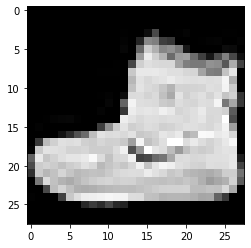

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train_all[0], cmap='gray')
plt.show()

In [11]:
np.bincount(y_train_all)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
print(np.bincount(y_train))
print(np.bincount(y_val))

[4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]
[1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]


In [13]:
x_train = x_train / 255
x_val = x_val /255

In [14]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

print(x_train.shape, x_val.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)


In [15]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

print(y_train[0], y_train_encoded[0])

6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [16]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.6266 - accuracy: 0.7824 - val_loss: 0.3286 - val_accuracy: 0.8795
Epoch 2/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3225 - accuracy: 0.8831 - val_loss: 0.2775 - val_accuracy: 0.9012
Epoch 3/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2685 - accuracy: 0.9003 - val_loss: 0.2807 - val_accuracy: 0.8987
Epoch 4/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2288 - accuracy: 0.9187 - val_loss: 0.2587 - val_accuracy: 0.9055
Epoch 5/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2022 - accuracy: 0.9273 - val_loss: 0.2432 - val_accuracy: 0.9136
Epoch 6/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1800 - accuracy: 0.9331 - val_loss: 0.2579 - val_accuracy: 0.9056
Epoch 7/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1663 - accuracy: 0.9401 - val_loss: 0.2480 -

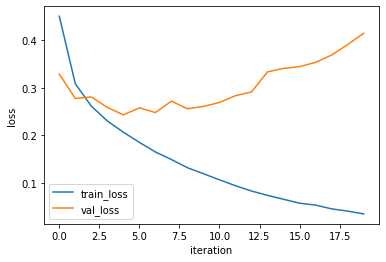

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

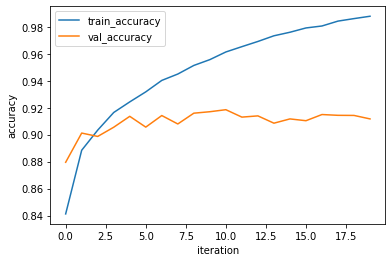

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [22]:
conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))
conv2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1960)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [23]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = conv2.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.6763 - accuracy: 0.7630 - val_loss: 0.3601 - val_accuracy: 0.8786
Epoch 2/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3802 - accuracy: 0.8630 - val_loss: 0.3058 - val_accuracy: 0.8873
Epoch 3/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3360 - accuracy: 0.8760 - val_loss: 0.2805 - val_accuracy: 0.8976
Epoch 4/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3136 - accuracy: 0.8818 - val_loss: 0.2640 - val_accuracy: 0.9039
Epoch 5/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2826 - accuracy: 0.8954 - val_loss: 0.2618 - val_accuracy: 0.9041
Epoch 6/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2704 - accuracy: 0.8990 - val_loss: 0.2561 - val_accuracy: 0.9067
Epoch 7/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2577 - accuracy: 0.9028 - val_loss: 0.2502 -

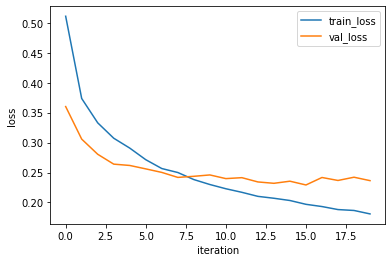

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

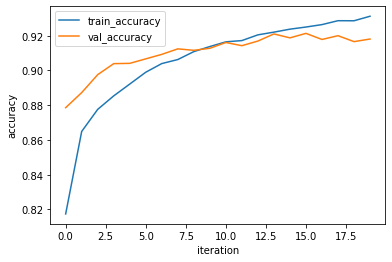

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()